# # Project: Data Science Blog Post - (Crimes in USA Boston Data)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#Business understanding">Business understanding</a></li>
<li><a href="#Data understanding">Data understanding</a></li>
<li><a href="#Data preparation and clean">Data preparation and clean</a></li>
<li><a href="#Answer Questions base on dataset">Answer Questions base on dataset</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
# Introduction

"Crime incident report are provided by Boston police Department(BPD) to document the inital details surraounding an incident to which BPD offecers respond. this is a data set containing records from the new crime incidents report system,which includes a reduced set of fields focused on capturing the type of incident as well as when and where it occured.Records begin in June 14 of 2015 and continue to september 3 of 2018".this dataset contain information about crimes in USA Boston which will be used in the 4th project od data science Udacity Nanodegree. This project will follow the CRISP-DM process (Cross Industry Process for Data Mining).


- Business understanding
- Data understanding
- Data preparation and clean
- Answer Questions base on dataset 
- conclusions

<a id='Business understanding'></a>

# Business understanding

In this project, will focus to answer this 4 questions:
- Does crime get higher in weekdayes or weekend?
- what is the 10 most famouse type of OFFENSE_DESCRIPTION in boston?
- The month which occured the largest rate of crimes?in what months the crime increase?
- Did the crime increas in the last 4 years?

In [19]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime
import glob
import os
%matplotlib inline
import seaborn as sns
import matplotlib

# magic word for producing visualizations in notebook
%matplotlib inline

In [20]:
import pandas as pd
df = pd.read_csv('crime.csv',header=0,encoding = 'unicode_escape')


<a id='Data understanding'></a>
# Data understanding
In this section i got ageneral idea about the data throw using head() and hist() plot and info() of the cloumns to get general idea about the data .

In [21]:
df.head()

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
0,I182070945,619,Larceny,LARCENY ALL OTHERS,D14,808,NaN,2018-09-02 13:00:00,2018,9,Sunday,13,Part One,LINCOLN ST,42.357791,-71.139371,"(42.35779134, -71.13937053)"
1,I182070943,1402,Vandalism,VANDALISM,C11,347,NaN,2018-08-21 00:00:00,2018,8,Tuesday,0,Part Two,HECLA ST,42.306821,-71.060300,"(42.30682138, -71.06030035)"
2,I182070941,3410,Towed,TOWED MOTOR VEHICLE,D4,151,NaN,2018-09-03 19:27:00,2018,9,Monday,19,Part Three,CAZENOVE ST,42.346589,-71.072429,"(42.34658879, -71.07242943)"
3,I182070940,3114,Investigate Property,INVESTIGATE PROPERTY,D4,272,NaN,2018-09-03 21:16:00,2018,9,Monday,21,Part Three,NEWCOMB ST,42.334182,-71.078664,"(42.33418175, -71.07866441)"
4,I182070938,3114,Investigate Property,INVESTIGATE PROPERTY,B3,421,NaN,2018-09-03 21:05:00,2018,9,Monday,21,Part Three,DELHI ST,42.275365,-71.090361,"(42.27536542, -71.09036101)"


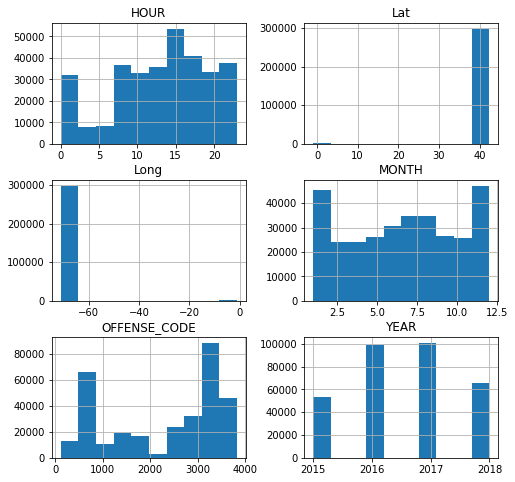

In [22]:
df.hist(figsize=(8,8));

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319073 entries, 0 to 319072
Data columns (total 17 columns):
INCIDENT_NUMBER        319073 non-null object
OFFENSE_CODE           319073 non-null int64
OFFENSE_CODE_GROUP     319073 non-null object
OFFENSE_DESCRIPTION    319073 non-null object
DISTRICT               317308 non-null object
REPORTING_AREA         319073 non-null object
SHOOTING               1019 non-null object
OCCURRED_ON_DATE       319073 non-null object
YEAR                   319073 non-null int64
MONTH                  319073 non-null int64
DAY_OF_WEEK            319073 non-null object
HOUR                   319073 non-null int64
UCR_PART               318983 non-null object
STREET                 308202 non-null object
Lat                    299074 non-null float64
Long                   299074 non-null float64
Location               319073 non-null object
dtypes: float64(2), int64(4), object(11)
memory usage: 41.4+ MB



<a id='Data preparation and clean'></a>
# Data preparation and clean
In this section of the report, i will check for duplication, null values and drop unnessecary cloumns in analysis ,i will clean the dataset to prepare it for analysis.

In [24]:
df.duplicated()

0         False
1         False
2         False
3         False
4         False
5         False
6         False
7         False
8         False
9         False
10        False
11        False
12        False
13        False
14        False
15        False
16        False
17        False
18        False
19        False
20        False
21        False
22        False
23        False
24        False
25        False
26        False
27        False
28        False
29        False
          ...  
319043    False
319044    False
319045    False
319046    False
319047    False
319048    False
319049    False
319050    False
319051     True
319052    False
319053    False
319054    False
319055    False
319056    False
319057    False
319058    False
319059    False
319060     True
319061    False
319062    False
319063    False
319064    False
319065    False
319066    False
319067    False
319068    False
319069    False
319070    False
319071    False
319072    False
Length: 319073, dtype: b

In [25]:
df.duplicated().sum()

23

In [26]:
df.loc[df.duplicated(keep=False),:]

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
318742,I152030570-00,3125,Warrant Arrests,WARRANT ARREST,E13,303,NaN,2016-10-29 08:25:00,2016,10,Saturday,8,Part Three,W WALNUT PARK,42.317207,-71.098799,"(42.31720702, -71.09879922)"
318745,I152030570-00,3125,Warrant Arrests,WARRANT ARREST,E13,303,NaN,2016-10-29 08:25:00,2016,10,Saturday,8,Part Three,W WALNUT PARK,42.317207,-71.098799,"(42.31720702, -71.09879922)"
318751,I152026775-00,3115,Investigate Person,INVESTIGATE PERSON,C6,936,NaN,2015-10-19 16:04:00,2015,10,Monday,16,Part Three,ORTON-MAROTTA WAY,42.338573,-71.055755,"(42.33857289, -71.05575501)"
318752,I152026775-00,3115,Investigate Person,INVESTIGATE PERSON,C6,936,NaN,2015-10-19 16:04:00,2015,10,Monday,16,Part Three,ORTON-MAROTTA WAY,42.338573,-71.055755,"(42.33857289, -71.05575501)"
318754,I152026488-00,3125,Warrant Arrests,WARRANT ARREST,A1,105,NaN,2017-01-31 10:00:00,2017,1,Tuesday,10,Part Three,FRUIT ST,42.362403,-71.069547,"(42.36240281, -71.06954652)"
318755,I152026488-00,3125,Warrant Arrests,WARRANT ARREST,A1,105,NaN,2017-01-31 10:00:00,2017,1,Tuesday,10,Part Three,FRUIT ST,42.362403,-71.069547,"(42.36240281, -71.06954652)"
318779,I152006153-00,1849,Drug Violation,"DRUGS - POSS CLASS B - COCAINE, ETC.",C6,179,NaN,2015-09-16 11:30:00,2015,9,Wednesday,11,Part Two,MASSACHUSETTS AVE,42.332531,-71.072130,"(42.33253100, -71.07213000)"
318781,I152006153-00,1849,Drug Violation,"DRUGS - POSS CLASS B - COCAINE, ETC.",C6,179,NaN,2015-09-16 11:30:00,2015,9,Wednesday,11,Part Two,MASSACHUSETTS AVE,42.332531,-71.072130,"(42.33253100, -71.07213000)"
318784,I152004688-00,3125,Warrant Arrests,WARRANT ARREST,A1,120,NaN,2016-07-19 12:50:00,2016,7,Tuesday,12,Part Three,BOYLSTON ST,42.352418,-71.065255,"(42.35241815, -71.06525499)"
318785,I152004688-00,3125,Warrant Arrests,WARRANT ARREST,A1,120,NaN,2016-07-19 12:50:00,2016,7,Tuesday,12,Part Three,BOYLSTON ST,42.352418,-71.065255,"(42.35241815, -71.06525499)"


In [27]:
df.drop_duplicates(keep='first').shape

(319050, 17)

I will drop the cloumns ['INCIDENT_NUMBER','OFFENSE_CODE', 'OFFENSE_CODE_GROUP', 'DISTRICT','REPORTING_AREA','SHOOTING','UCR_PART','STREET','Lat','Long','Location'] becouse i will not use them in the analysis

In [28]:
#drop coloumns that wont be needed in the analysis
# dropping passed columns 
df.drop(['INCIDENT_NUMBER','OFFENSE_CODE', 'OFFENSE_CODE_GROUP', 'DISTRICT','REPORTING_AREA','SHOOTING','UCR_PART','STREET','Lat','Long','Location'], axis = 1, inplace = True) 
  
# display 
df

,OFFENSE_DESCRIPTION,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR
0,LARCENY ALL OTHERS,2018-09-02 13:00:00,2018,9,Sunday,13
1,VANDALISM,2018-08-21 00:00:00,2018,8,Tuesday,0
2,TOWED MOTOR VEHICLE,2018-09-03 19:27:00,2018,9,Monday,19
3,INVESTIGATE PROPERTY,2018-09-03 21:16:00,2018,9,Monday,21
4,INVESTIGATE PROPERTY,2018-09-03 21:05:00,2018,9,Monday,21
5,M/V ACCIDENT INVOLVING PEDESTRIAN - INJURY,2018-09-03 21:09:00,2018,9,Monday,21
6,AUTO THEFT,2018-09-03 21:25:00,2018,9,Monday,21
7,VERBAL DISPUTE,2018-09-03 20:39:37,2018,9,Monday,20
8,ROBBERY - STREET,2018-09-03 20:48:00,2018,9,Monday,20
9,VERBAL DISPUTE,2018-09-03 20:38:00,2018,9,Monday,20


In [29]:
df.head()

,OFFENSE_DESCRIPTION,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR
0,LARCENY ALL OTHERS,2018-09-02 13:00:00,2018,9,Sunday,13
1,VANDALISM,2018-08-21 00:00:00,2018,8,Tuesday,0
2,TOWED MOTOR VEHICLE,2018-09-03 19:27:00,2018,9,Monday,19
3,INVESTIGATE PROPERTY,2018-09-03 21:16:00,2018,9,Monday,21
4,INVESTIGATE PROPERTY,2018-09-03 21:05:00,2018,9,Monday,21


In [30]:
df.isnull().sum()

OFFENSE_DESCRIPTION    0
OCCURRED_ON_DATE       0
YEAR                   0
MONTH                  0
DAY_OF_WEEK            0
HOUR                   0
dtype: int64

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319073 entries, 0 to 319072
Data columns (total 6 columns):
OFFENSE_DESCRIPTION    319073 non-null object
OCCURRED_ON_DATE       319073 non-null object
YEAR                   319073 non-null int64
MONTH                  319073 non-null int64
DAY_OF_WEEK            319073 non-null object
HOUR                   319073 non-null int64
dtypes: int64(3), object(3)
memory usage: 14.6+ MB


<a id='Answer Questions base on dataset'></a>
# Answer Questions base on dataset


- Does crime get higher in weekdayes or weekend?

In [42]:
df_day_of_week=df.DAY_OF_WEEK.value_counts()
df_day_of_week

Friday       48495
Wednesday    46729
Thursday     46656
Tuesday      46383
Monday       45679
Saturday     44818
Sunday       40313
Name: DAY_OF_WEEK, dtype: int64

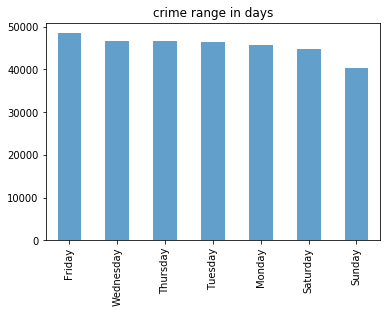

In [43]:
ax = df_day_of_week.plot(kind="bar", alpha=0.7);
plt.title("crime range in days");

In [44]:
df_day_of_week.describe()

count        7.000000
mean     45581.857143
std       2580.430224
min      40313.000000
25%      45248.500000
50%      46383.000000
75%      46692.500000
max      48495.000000
Name: DAY_OF_WEEK, dtype: float64

- what is the 10 most famouse type of OFFENSE_DESCRIPTION in boston?

SICK/INJURED/MEDICAL - PERSON            18783
INVESTIGATE PERSON                       18754
M/V - LEAVING SCENE - PROPERTY DAMAGE    16323
VANDALISM                                15154
ASSAULT SIMPLE - BATTERY                 14791
VERBAL DISPUTE                           13099
TOWED MOTOR VEHICLE                      11287
INVESTIGATE PROPERTY                     11124
LARCENY THEFT FROM BUILDING               9069
THREATS TO DO BODILY HARM                 9042
Name: OFFENSE_DESCRIPTION, dtype: int64


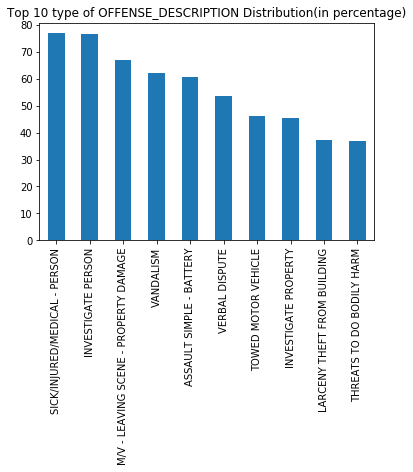

In [45]:
df_offense = df.OFFENSE_DESCRIPTION.value_counts()
print(df_offense.head(10))
(df_offense.head(10)/df_offense.shape[0]).plot(kind="bar");
plt.title("Top 10 type of OFFENSE_DESCRIPTION Distribution(in percentage)");

- The month which occured the largest rate of crimes? 

In [46]:
df[["MONTH"]] = df[["MONTH"]].astype(str)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319073 entries, 0 to 319072
Data columns (total 6 columns):
OFFENSE_DESCRIPTION    319073 non-null object
OCCURRED_ON_DATE       319073 non-null object
YEAR                   319073 non-null object
MONTH                  319073 non-null object
DAY_OF_WEEK            319073 non-null object
HOUR                   319073 non-null int64
dtypes: int64(1), object(5)
memory usage: 14.6+ MB


In [47]:
df_MONTH=df.MONTH.value_counts()
df_MONTH

8     34823
7     34556
6     30568
9     26543
5     26199
10    25737
3     24146
4     24086
11    23675
1     23610
12    23477
2     21653
Name: MONTH, dtype: int64

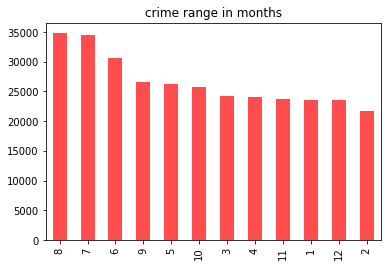

In [48]:
av = df_MONTH.plot(kind="bar", alpha=0.7,color='red');
plt.title("crime range in months");
plt.show();

- Did the crime increas in the last 4 years? crimes activity was high in 2016 and 2017 and decresed at 2018

In [49]:
df[["YEAR"]] = df[["YEAR"]].astype(str)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319073 entries, 0 to 319072
Data columns (total 6 columns):
OFFENSE_DESCRIPTION    319073 non-null object
OCCURRED_ON_DATE       319073 non-null object
YEAR                   319073 non-null object
MONTH                  319073 non-null object
DAY_OF_WEEK            319073 non-null object
HOUR                   319073 non-null int64
dtypes: int64(1), object(5)
memory usage: 14.6+ MB


In [50]:
df_YEAR=df.YEAR.value_counts()
df_YEAR

2017    100886
2016     99114
2018     65685
2015     53388
Name: YEAR, dtype: int64

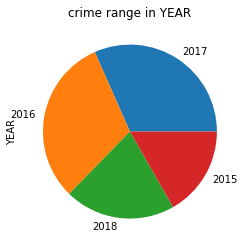

In [51]:
af = df_YEAR.plot(kind="pie");
plt.title("crime range in YEAR");
plt.show();

<a id='conclusions'></a>
# conclusions

- Crimes does not affected with weekdayes or weekend as we can see from the mean and the plot, the results are very close to each other
- Top 10 type of OFFENSE_DESCRIPTION Distribution
     - SICK/INJURED/MEDICAL - PERSON 
     - INVESTIGATE PERSON 
     - M/V - LEAVING SCENE - PROPERTY DAMAGE 
     - VANDALISM 
     - SSAULT SIMPLE - BATTERY 
     - VERBAL DISPUTE 
     - TOWED MOTOR VEHICLE 
     - INVESTIGATE PROPERTY 
     - LARCENY THEFT FROM BUILDING 
     - THREATS TO DO BODILY HARM 
     - Months 6,7 and 8 ( june,julay and augast)get highr in crimes activity ,so we can say that summer break in boston might
       have highr crimes activity
     - Crimes activity was high in 2016 and 2017 and decresed at 2018.


**Refrences

1. https://classroom.udacity.com/nanodegrees/nd025-mena-connect/parts/24b9c8f5-ef0f-4250-84d9-c5e8f843ed33/modules/808dc368-31ec-4d9f-85d6-27cbdc87bac4/lessons/f3e386bb-fe90-4e3c-8fc5-ad2db83e6cf6/concepts/b5016b84-0a83-478b-8ca1-68936e090990
2. https://www.kaggle.com/AnalyzeBoston/crimes-in-boston#crime.csv
3. https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.html
4. https://www.geeksforgeeks.org